# 模型正则化(限制参数的大小)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', lin_reg)
    ])

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
Y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [6]:
from sklearn.metrics import mean_squared_error

poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, Y)
Y100_predict = poly100_reg.predict(X)
mean_squared_error(Y, Y100_predict)

0.6807810661561912

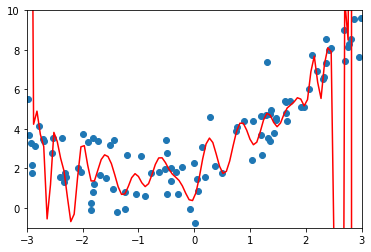

In [7]:
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
Y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, Y)
plt.plot(X_plot[:, 0], Y_plot, color='r')
plt.axis([-3, 3, -1, 10])
plt.show()

In [8]:
lin_reg.coef_

array([ 6.76189003e+11,  1.17672200e+01,  1.74502949e+02, -3.06089479e+02,
       -1.72793324e+04, -1.35751803e+04,  7.91280413e+05,  7.23106903e+05,
       -2.09051614e+07, -1.17718061e+07,  3.57298037e+08,  6.64111633e+07,
       -4.21137077e+09,  4.22663395e+08,  3.55206783e+10, -9.95656109e+09,
       -2.18756034e+11,  8.10714868e+10,  9.90704571e+11, -3.90390159e+11,
       -3.27783915e+12,  1.21354552e+12,  7.71516390e+12, -2.40899889e+12,
       -1.20585678e+13,  2.69231442e+12,  1.00773350e+13, -7.13273018e+11,
        8.57680875e+11, -1.79966762e+12, -9.39779983e+12,  1.11053071e+12,
        2.38105210e+12,  1.39200348e+12,  7.93649840e+12, -6.10046958e+11,
       -1.13187235e+12, -1.14511615e+12, -7.05352092e+12, -5.06566085e+11,
       -2.59631267e+12,  6.88778010e+11,  5.19421017e+12,  1.20096604e+12,
        5.61036367e+12,  5.62340376e+11, -9.39630807e+10, -9.57276597e+11,
       -5.32966874e+12, -9.24919843e+11, -4.78859635e+12, -1.01044157e+12,
       -1.21915690e+11,  

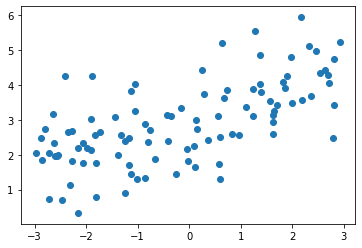

In [9]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
Y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

plt.scatter(X, Y)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [11]:
poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, Y_train)

Y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(Y_test, Y_poly_predict)

167.9401087009438

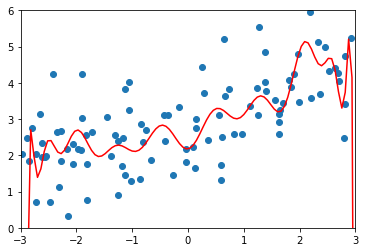

In [12]:
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
Y_plot = poly_reg.predict(X_plot)

plt.scatter(x, Y)
plt.plot(X_plot[:, 0], Y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

In [13]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    Y_plot = model.predict(X_plot)

    plt.scatter(x, Y)
    plt.plot(X_plot[:, 0], Y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

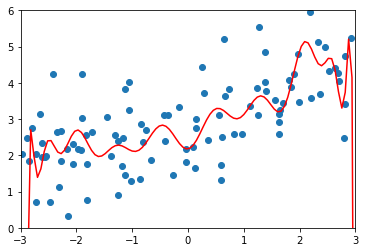

In [14]:
plot_model(poly_reg)

## 使用领回归

### 目标：使 $\sum_{i=1}^{m}\left(y^{(i)}-\theta_{0}-\theta_{1} X_{1}^{(i)}-\theta_{2} X_{2}^{(i)}-\ldots-\theta_{n} X_{n}^{(i)}\right)^{2}$ 尽可能小

### 目标：使 $J(\theta)=M S E(y, \hat{y} ; \theta)$ 尽可能小

### 加入模型正则化, 目标：使 $J(\theta)=M S E(y, \hat{y} ; \theta)+\alpha \frac{1}{2} \sum_{i=1}^{n} \theta_{i}^{2}$ 尽可能小

In [15]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', Ridge(alpha=alpha))
    ])

In [16]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, Y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(Y_test, y1_predict)

1.3233492754155471

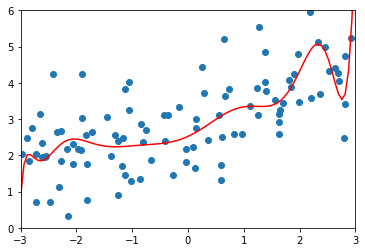

In [17]:
plot_model(ridge1_reg)

In [19]:
ridge2_reg = RidgeRegression(20, 1)
ridge2_reg.fit(X_train, Y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(Y_test, y2_predict)

1.1888759304218448

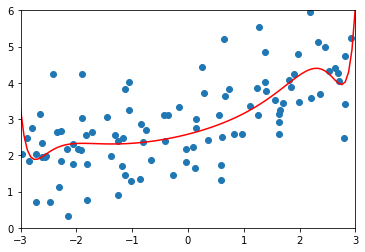

In [20]:
plot_model(ridge2_reg)

In [21]:
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, Y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(Y_test, y3_predict)

1.3196456113086197

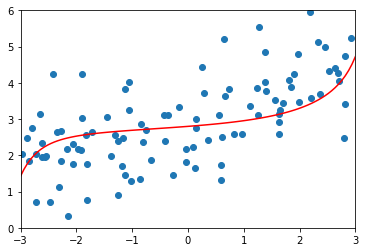

In [22]:
plot_model(ridge3_reg)

In [23]:
ridge4_reg = RidgeRegression(20, 100000000)
ridge4_reg.fit(X_train, Y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(Y_test, y4_predict)

1.840889124848122

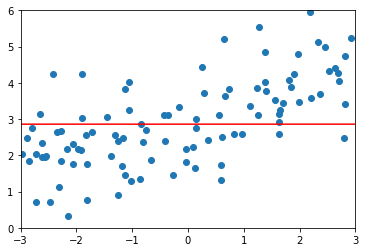

In [24]:
plot_model(ridge4_reg)